In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [2]:
import sys
import sklearn

In [3]:
print('Dimensions of the  dataset:',df.shape)

Dimensions of the  dataset: (225745, 79)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [5]:
dropdf= df.dropna()
dropdf.shape

(225741, 79)

In [6]:
dropdf.isna().any()[lambda x:x]

Series([], dtype: bool)

In [7]:
del dropdf['Flow Bytes/s']
del dropdf[' Flow Packets/s']

In [8]:
df.iloc[0]

 Destination Port               54865
 Flow Duration                      3
 Total Fwd Packets                  2
 Total Backward Packets             0
Total Length of Fwd Packets        12
                                ...  
Idle Mean                         0.0
 Idle Std                         0.0
 Idle Max                           0
 Idle Min                           0
 Label                         BENIGN
Name: 0, Length: 79, dtype: object

In [9]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(dropdf,test_size = 0.20)
print(df_train.shape)
print(df_test.shape)

(180592, 77)
(45149, 77)


In [10]:
print('Label distribution Training set:')
print(df_train[' Label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test[' Label'].value_counts())

Label distribution Training set:
 Label
DDoS      102396
BENIGN     78196
Name: count, dtype: int64

Label distribution Test set:
 Label
DDoS      25631
BENIGN    19518
Name: count, dtype: int64


In [11]:
# Setting the new value

labeldf=df_train[' Label']
print(labeldf)


162031      DDoS
24607       DDoS
8825      BENIGN
214017    BENIGN
175005    BENIGN
           ...  
189139      DDoS
13275     BENIGN
102704    BENIGN
52149     BENIGN
132992      DDoS
Name:  Label, Length: 180592, dtype: object


In [12]:
labeldf_test=df_test[' Label']
print(labeldf_test)
#change the label column

103666    BENIGN
136654      DDoS
18989       DDoS
84444       DDoS
87566     BENIGN
           ...  
9439      BENIGN
125099      DDoS
92120       DDoS
128243    BENIGN
128359    BENIGN
Name:  Label, Length: 45149, dtype: object


In [18]:
newlabeldf_test=labeldf_test.replace({ 'BENIGN' : 0, 'DDoS' : 1 })
#print(newlabeldf)
newlabeldf=labeldf.replace({ 'BENIGN' : 0, 'DDoS' : 1 })
df_train[' Label'] = newlabeldf
df_test[' Label'] = newlabeldf_test
#print(df_train[' Label'])

In [26]:
X_df_train = df_train.drop([' Label'], axis = 1)
Y_df_train = df_train[' Label']
X_df_test = df_test.drop([' Label'], axis = 1)
Y_df_test = df_test[' Label']


In [27]:
colNames=list(X_df_train)
colNames_test=list(X_df_test)
X_df_train.shape
print(colNames)

[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Fl

In [28]:
print(X_df_train)
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_df_train)
X_df_train=scaler1.transform(X_df_train) 
# test data
scaler2 = preprocessing.StandardScaler().fit(X_df_test)
X_df_test=scaler2.transform(X_df_test) 

         Destination Port   Flow Duration   Total Fwd Packets  \
162031                 80           37113                   3   
24607                  80          800246                   3   
8825                  443         5879841                   8   
214017                 53           30433                   1   
175005                 53           31384                   2   
...                   ...             ...                 ...   
189139                 80        11429719                   5   
13275               58231              72                   1   
102704                 53             233                   2   
52149               57046        74380029                   8   
132992                 80          943440                   3   

         Total Backward Packets  Total Length of Fwd Packets  \
162031                        5                           26   
24607                         5                           26   
8825                       

In [29]:
print(X_df_train.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [30]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore')
selector=SelectPercentile(f_classif, percentile=10)
X_newdf_train = selector.fit_transform(X_df_train,Y_df_train)
X_newdf_train.shape

c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [29 30 31 47 54 55 56 57 58 59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(180592, 8)

In [31]:
true=selector.get_support()
newcolindex_DDoS=[i for i, x in enumerate(true) if x]
newcolname_DDoS=list( colNames[i] for i in newcolindex_DDoS )
newcolname_DDoS

[' Destination Port',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Packet Length Mean',
 ' URG Flag Count',
 ' Average Packet Size',
 ' Avg Bwd Segment Size']

In [32]:
print('Features selected for DDoS:',newcolname_DDoS)

Features selected for DDoS: [' Destination Port', 'Bwd Packet Length Max', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Packet Length Mean', ' URG Flag Count', ' Average Packet Size', ' Avg Bwd Segment Size']


In [33]:
'''from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_df_train) '''

'from sklearn import preprocessing\nfrom sklearn import utils\n\nlab_enc = preprocessing.LabelEncoder()\nencoded = lab_enc.fit_transform(Y_df_train) '

In [34]:
Y_df_train=Y_df_train.astype('int')

In [35]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newdf_train, Y_df_train)
print ("DDoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 1), rfe.ranking_), newcolname_DDoS)))

DDoS Features sorted by their rank:
[(1, ' Destination Port'), (2, ' Average Packet Size'), (3, ' Packet Length Mean'), (4, ' Bwd Packet Length Std'), (5, ' Bwd Packet Length Mean'), (6, ' Avg Bwd Segment Size'), (7, ' URG Flag Count'), (8, 'Bwd Packet Length Max')]


In [36]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=8, step=1)
rfe.fit(X_df_train, Y_df_train)
X_rfeDDoS=rfe.transform(X_df_train)
true=rfe.support_
rfecolindex_DDoS=[i for i, x in enumerate(true) if x]
rfecolname_DDoS=list(colNames[i] for i in rfecolindex_DDoS)

In [37]:
print('Features selected for DDoS:',rfecolname_DDoS)

Features selected for DDoS: [' Destination Port', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Bwd Packet Length Min', ' Fwd IAT Min', ' Bwd Packets/s', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward']


In [38]:
print(X_rfeDDoS.shape)

(180592, 8)


In [39]:
# all features
clf_DDoS=DecisionTreeClassifier(random_state=0)
clf_DDoS.fit(X_df_train, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [40]:
#selected features
clf_rfeDDoS=DecisionTreeClassifier(random_state=0)
clf_rfeDDoS.fit(X_rfeDDoS, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [41]:
Y_df_train_pred=clf_DDoS.predict(X_df_test)
# Create confusion matrix
pd.crosstab(Y_df_test, Y_df_train_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,19424,94
1,25618,13


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99960 (+/- 0.00084)
Precision: 0.99949 (+/- 0.00110)
Recall: 0.99980 (+/- 0.00052)
F-measure: 0.99965 (+/- 0.00074)


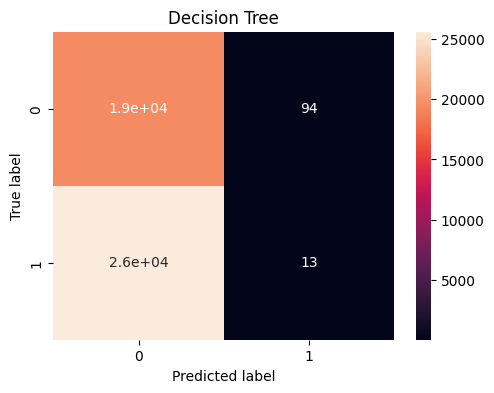

In [48]:
#confusion matrix GRAPH
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_df_test, Y_df_train_pred)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('Decision Tree')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [50]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: google-images-search 1.4.6 has a non-standard dependency specifier click>=7.0<=8.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of google-images-search or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
newcolname_DDoS

[' Destination Port',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Packet Length Mean',
 ' URG Flag Count',
 ' Average Packet Size',
 ' Avg Bwd Segment Size']

In [53]:
x=newcolname_DDoS[1]
y=newcolname_DDoS[3]

In [54]:
df_2 =df_test.iloc[:1000]
df_2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
103666,63419,24196075,1,5,6,30,6,6,6.000000,0.000000,...,20,36034.0,0.0,36034,36034,24200000.0,0.0,24200000,24200000,0
136654,80,3813925,5,0,30,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
18989,80,7010466,4,0,24,0,6,6,6.000000,0.000000,...,20,568.0,0.0,568,568,7009898.0,0.0,7009898,7009898,1
84444,80,93147,3,6,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
87566,61023,7961270,1,5,6,30,6,6,6.000000,0.000000,...,20,33530.0,0.0,33530,33530,7927740.0,0.0,7927740,7927740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45394,80,1467981,5,0,30,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
216432,123,42621,1,1,48,48,48,48,48.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
25956,80,6059831,4,0,24,0,6,6,6.000000,0.000000,...,20,5008.0,0.0,5008,5008,6054823.0,0.0,6054823,6054823,1
188850,80,915937,3,6,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


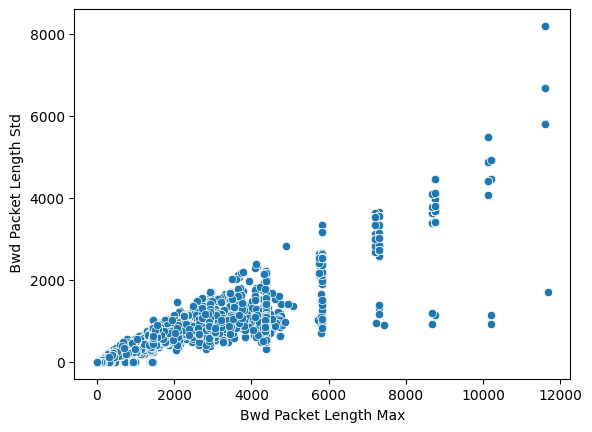

<Figure size 640x480 with 0 Axes>

In [55]:
sns.scatterplot(data = df, x = x, y = y)
plt.show()
plt.savefig('Visualize-DestinationvsBwdPacketLength.jpg')

In [57]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_df_train, Y_df_train)
Y_pred = logreg.predict(X_df_test)

In [58]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_df_test, Y_pred)
print(confusion_matrix)

[[19489    29]
 [   29 25602]]


In [60]:
#accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_df_test, Y_df_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [61]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_df_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19518
           1       1.00      1.00      1.00     25631

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149



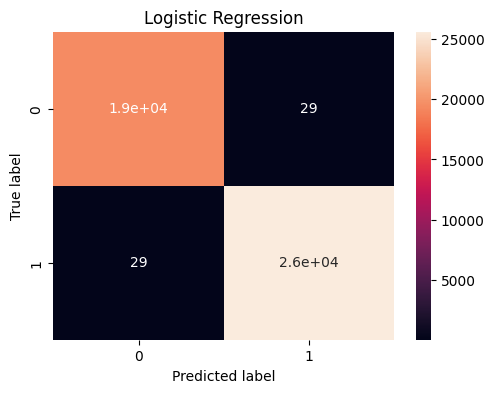

In [62]:
#plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_df_test, Y_pred)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

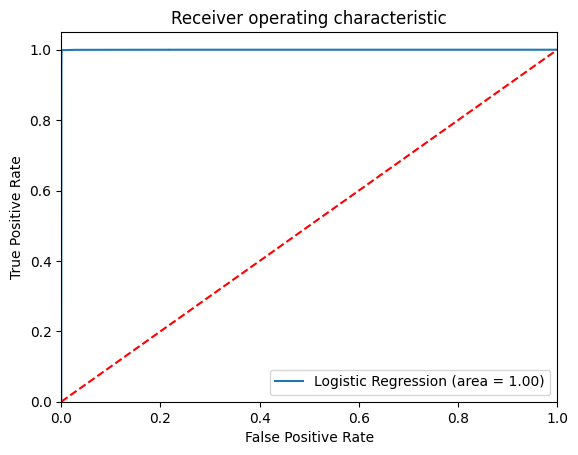

In [63]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_df_test, logreg.predict(X_df_test))
fpr, tpr, thresholds = roc_curve(Y_df_test, logreg.predict_proba(X_df_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

DecisionTreeClassifier(random_state=0) Accuracy: 43.05
Confusion Matrix: 
 [[19424    94]
 [25618    13]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.43      1.00      0.60     19518
           1       0.12      0.00      0.00     25631

    accuracy                           0.43     45149
   macro avg       0.28      0.50      0.30     45149
weighted avg       0.26      0.43      0.26     45149

LogisticRegression() Accuracy: 99.87
Confusion Matrix: 
 [[19489    29]
 [   29 25602]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19518
           1       1.00      1.00      1.00     25631

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149



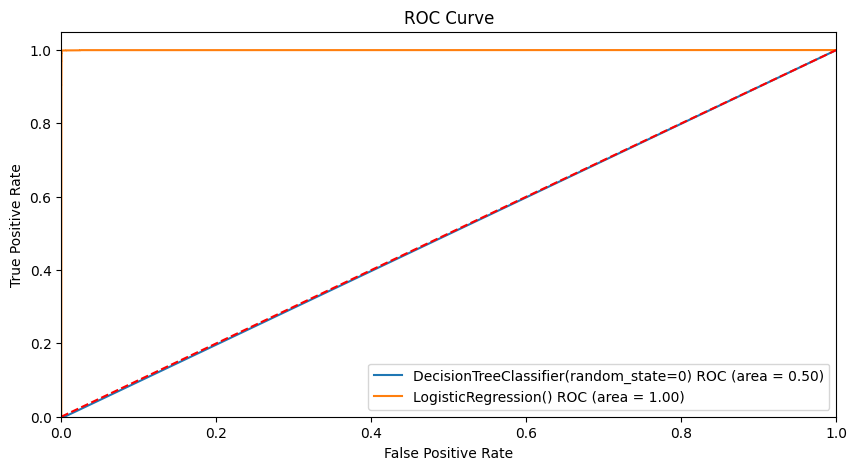

In [64]:
#comparision of accuracy of decision tree and logistic regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,5))
models = [clf_DDoS, logreg]
for model in models:
    model.fit(X_df_train, Y_df_train)
    Y_pred = model.predict(X_df_test)
    accuracy = accuracy_score(Y_df_test, Y_pred) * 100
    print("{} Accuracy: {:.2f}".format(model, accuracy))
    print('Confusion Matrix: \n', confusion_matrix(Y_df_test, Y_pred))
    print('Classification Report: \n', classification_report(Y_df_test, Y_pred))
    try:
        Y_pred_prob = model.predict_proba(X_df_test)[:,1]
        fpr, tpr, thresholds = roc_curve(Y_df_test, Y_pred_prob)
        auc = roc_auc_score(Y_df_test, Y_pred_prob)
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model, auc))
    except:
        pass
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()